# Benjamini-Hochberg False Discovery Rate
---

## Publication:
### Benjamini, Y., & Hochberg, Y. (1995). Controlling the False Discovery Rate: A Practical and Powerful Approach to Multiple Testing. Journal of the Royal Statistical Society. Series B (Methodological), 57(1), 289-300. Retrieved from http://www.jstor.org/stable/2346101

## In this notebook, I will demonstrate a geometric representation of BH FDR correction. 

### As describe in Wikipedia (https://en.wikipedia.org/wiki/False_discovery_rate#Benjamini%E2%80%93Hochberg_procedure):


---
## Formula for BH FDR

### For a given $\alpha$, find the largest $k$ such that $P_{(k)}\leq {\frac {k}{m}}\alpha$ where $P_{(k)}$ is our p-value, $k$ is the rank of that p-value, $m$ is the number of p-values, and $\alpha$ is our significance cutoff.
### Reject the null hypothesis (i.e., declare discoveries) for all $H_{(i)}$ for $i = 1 , \ldots, k$.

---
## What we'll see:

### Geometrically, this FDR procedure corresponds to plotting $P_{(k)}$ vs. $k$ (on the y and x axes respectively), drawing the line through the origin with slope ${\frac {\alpha }{m}}$, and rejecting all null hypotheses that are to the left of where the points cross the line.

In [24]:
# First, we'll import all of the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.sandbox.stats.multicomp import multipletests

In [25]:
# Next, we'll open some example p-values -- these are unsorted and we won't worry about what they correspond to
# We will read them, sort them, and reset the index
df = pd.read_csv("p-values.txt").sort_values(by="p_values")
df.reset_index(inplace=True, drop=True)
print(len(df.p_values))
df.head()

3362


,p_values
0,2.289478e-11
1,9.912538e-11
2,7.302179e-10
3,1.101082e-09
4,1.306089e-09


In [26]:
# Here is a function I designed to perform the correction
def fdr_bh(df, alpha=0.05):
    """Given a dataframe with p_values, return dataframe with additional column of True/False if significant/not"""
    df["significant"]=[True if i <= ((df.index[x]+1)/len(df.index))*alpha else False for x,i in enumerate(df.p_values)]
    return df

In [27]:
df = fdr_bh(df)
df.head()

,p_values,significant
0,2.289478e-11,True
1,9.912538e-11,True
2,7.302179e-10,True
3,1.101082e-09,True
4,1.306089e-09,True


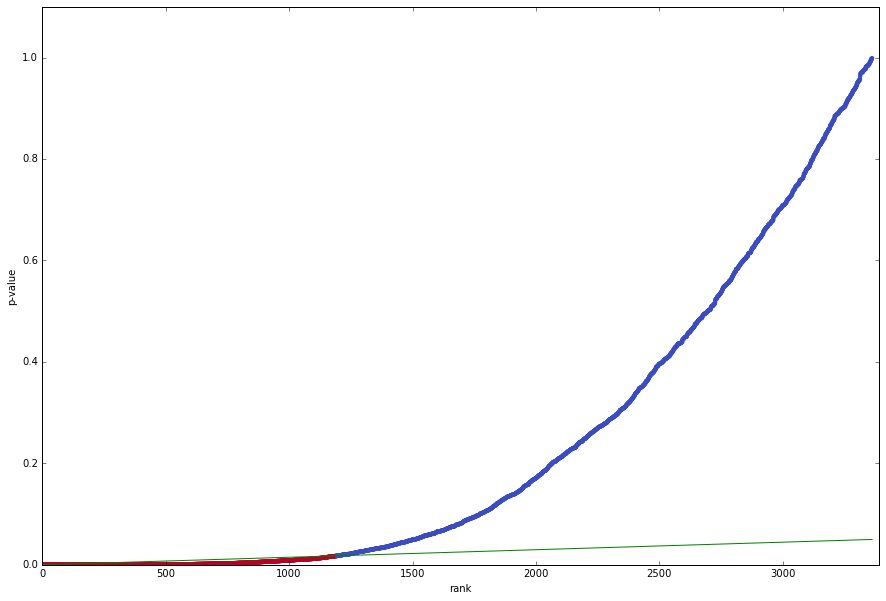

In [28]:
# y = slope*x + intercept
# slope = alpha/m
# intercept = 0
# Formula now:
# y = alpha/m*x + b

# x values go from 0-3361 (number of p-values)
x = np.linspace(0,3361,3362)
y = [(0.05/3362)*i for i in x]

plt.figure(figsize=(15,10))
plt.scatter(df.index, df.p_values, marker='o',c=df.significant, cmap=plt.cm.coolwarm, edgecolors='none')
plt.plot(x,y, color='g', linewidth=1)
plt.xlim(0,3390)
plt.ylim(0,1.1)
plt.ylabel("p-value")
plt.xlabel("rank")
plt.show()

In [35]:
# So, the points cross the line between dataframe index (or rank or x value) 1194 and 1195
# See below
df[1193:1197]

# As mentioned, everything to the left of this crossing -- all points in red -- 
# are signficantly different from the null

,p_values,adj_p_values,significant
1193,0.017513,0.049312,True
1194,0.017570,0.049432,True
1195,0.017829,0.050117,False
1196,0.017866,0.050164,False


In [29]:
# Next, we'll re-open the data and use an existing package to perform FDR correction
df = pd.read_csv("p-values.txt").sort_values(by="p_values")
df.reset_index(inplace=True, drop=True)
print(len(df.p_values))
df.head()

3362


,p_values
0,2.289478e-11
1,9.912538e-11
2,7.302179e-10
3,1.101082e-09
4,1.306089e-09


In [30]:
# We'll correct our p-values using multipletests from statsmodels
# Returns array of True/False where True for hypothesis that can be rejected for given alpha
#         array of adjusted p-values
#         corrected alpha for Sidak method -- we'll ignore
#         corrected alpha for Bonferroni method -- we'll ignore
adj_p_values = multipletests(df.p_values, alpha=0.05, method="fdr_bh")
df["adj_p_values"]=adj_p_values[1]
df["significant"]=adj_p_values[0]
df.head()

,p_values,adj_p_values,significant
0,2.289478e-11,7.697224e-08,True
1,9.912538e-11,1.666298e-07,True
2,7.302179e-10,8.183308e-07,True
3,1.101082e-09,8.782145e-07,True
4,1.306089e-09,8.782145e-07,True


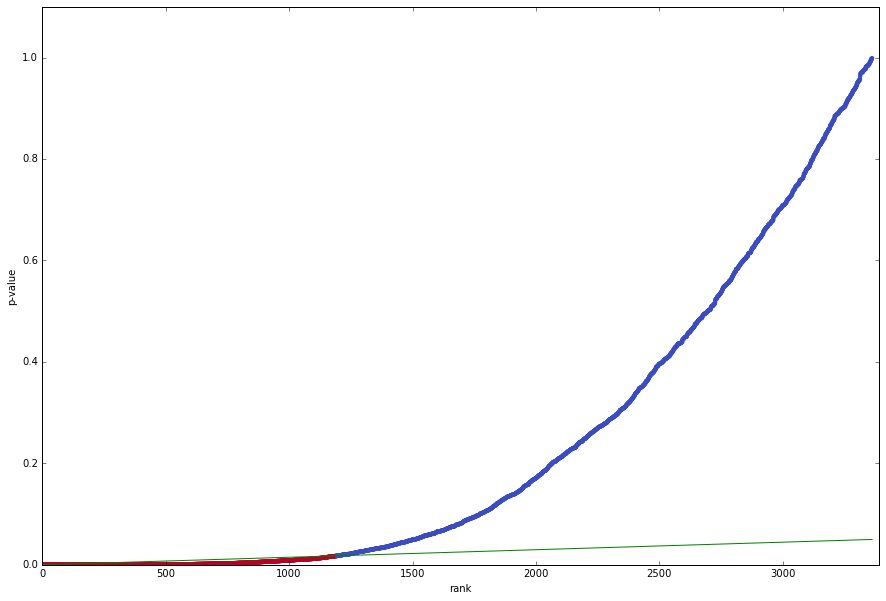

In [31]:
# y = slope*x + intercept
# slope = alpha/m
# intercept = 0
# Formula now:
# y = alpha/m*x + b

# x values go from 0-3361 (number of p-values)
x = np.linspace(0,3361,3362)
y = [(0.05/3362)*i for i in x]

plt.figure(figsize=(15,10))
plt.scatter(df.index, df.p_values, marker='o',c=df.significant, cmap=plt.cm.coolwarm, edgecolors='none')
plt.plot(x,y, color='g', linewidth=1)
plt.xlim(0,3390)
plt.ylim(0,1.1)
plt.ylabel("p-value")
plt.xlabel("rank")
plt.show()

In [ ]:
# Just as we saw above, the points cross the line between dataframe index (or rank or x value) 1194 and 1195
# See below
df[1193:1197]

# Everything to the left of this crossing -- all points in red -- 
# are signficantly different from the null